# Deep Learning

Regression

In [38]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

# from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer, r2_score

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('insurance.csv') #load the dataset
print(df.shape)
df.head(3)

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,1,southwest,16884.9240
1,18,0,33.77,1,0,southeast,1725.5523
2,28,0,33.00,3,0,southeast,4449.4620


In [3]:
# inspect categorical features
df.region.unique()

array(['southwest', 'southeast', '0rthwest', '0rtheast'], dtype=object)

In [4]:
# clean categorical features
df.region = df.region.replace('0', 'no', regex=True)
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [5]:
# Define X and y
X = df.iloc[:,0:6]
y = df.iloc[:,-1]

In [6]:
# one-hot encoding for categorical variables
X = pd.get_dummies(X) 
X.head(2)

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.90,0,1,0,0,0,1
1,18,0,33.77,1,0,0,0,1,0


`Note:`

Train,Test, Validation splits comes differently in terms of Neural Networks. Usually using traditional ML algorithm we do the process is to split a given data set into 70% train data set and 30% test data set (ideally). In the training phase, we fit the model on the training data. And now to evaluate the model (i.e., to check how well the model is able to predict on unseen data), we run the model against the test data and get the predicted results. Since we already know what the expected results are, we compare the predicted and the real results to get the accuracy of the model.
If the accuracy is not up to the desired level, we repeat the above process (train, test, compare) until the desired accuracy is achieved.

In Neural Networks approach, we do spliting our data set in train_test_plit. And In training/fitting phase we do spliting again. We split out training and validation_set. Then finally we will test our model using the testing set(unseen data) and compare the predicted result to the real result.

In [7]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.1, # 10%
                                                    random_state = 42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1204, 9) (134, 9) (1204,) (134,)


In [8]:
# standardize
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Designing Model

In [9]:
# Creating a keras sequential object
model_regr = Sequential()

In [11]:
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)

### Define Model

In [12]:
############## INPUT LAYER ##########################################
model_regr.add(Dense(units = X.shape[1] , activation = 'relu')) 


############## HIDDEN LAYER 1 ##########################################
# `Note:`
# How do we choose the number of hidden layers and the number of units per layer? That is a tough question and there 
# is no good answer. The rule of thumb is to start with one hidden layer and add as many units as we have features in the
# dataset. However, this might not always work. We need to try things out and observe our learning curve.

# there are a numbers of activation functions such as softmax, sigmoid, 
# but ReLU (relu) (Rectified Linear Unit) is very effective in many applications and we’ll use it here.
model_regr.add(Dense(128, activation = 'relu'))
# Adding dropout
model_regr.add(layers.Dropout(0.1))

############## OUTPUT LAYER ##########################################
model_regr.add(Dense(1, activation = 'linear'))  

### OPTIMIZER

In [13]:
# We have a lot of optimizers such as SGD (Stochastic Gradient Descent optimizer), Adam, RMSprop, and others.
# right now adam is the best one as its solved previous optmizers issues.
opt = Adam(learning_rate = 0.01) # by default adam learning rate is 0.0.1

### COMPILE MODEL

In [14]:
# loss/cost 
# MSE, MAE, Huber loss  
model_regr.compile(loss='mse',  metrics=['mae'], optimizer=opt)  

### TRAINING PHASE/FIT THE MODEL

Add early stoping when theres no improvement.

In [15]:
# reference https://keras.io/api/callbacks/early_stopping/
stop = EarlyStopping(monitor='val_loss', # validation_split 20%
                     mode='min', 
                     patience=30,
                     verbose=1)

Here we define a validation_set to 20%. Spliting our training set in 80:20 ratio

In [17]:
h = model_regr.fit(x_train, y_train, 
               validation_split=0.2, 
               epochs=100, 
               batch_size=1,
               verbose=1,
               callbacks=[stop])

Epoch 1/100
963/963 [==============================] - 1s 1ms/step - loss: 24820382.0000 - mae: 3025.9592 - val_loss: 23699988.0000 - val_mae: 2795.0173
Epoch 2/100
963/963 [==============================] - 1s 1ms/step - loss: 24592010.0000 - mae: 2984.0212 - val_loss: 25024636.0000 - val_mae: 2795.5161
Epoch 3/100
963/963 [==============================] - 1s 1ms/step - loss: 23590964.0000 - mae: 2938.5601 - val_loss: 25279652.0000 - val_mae: 2821.8726
Epoch 4/100
963/963 [==============================] - 1s 1ms/step - loss: 23438996.0000 - mae: 2953.0911 - val_loss: 28832708.0000 - val_mae: 2799.7874
Epoch 5/100
963/963 [==============================] - 1s 1ms/step - loss: 23336510.0000 - mae: 2917.9666 - val_loss: 25075002.0000 - val_mae: 2609.6379
Epoch 6/100
963/963 [==============================] - 1s 1ms/step - loss: 23326430.0000 - mae: 2856.7280 - val_loss: 28277488.0000 - val_mae: 2945.2722
Epoch 7/100
963/963 [==============================] - 1s 1ms/step - loss: 2328441

#### Model Summary

In [18]:
# view summary
model_regr.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 90        
                                                                 
 dense_1 (Dense)             (None, 128)               1280      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,499
Trainable params: 1,499
Non-trainable params: 0
_________________________________________________________________


In [19]:
h.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

Text(0, 0.5, 'MAE')

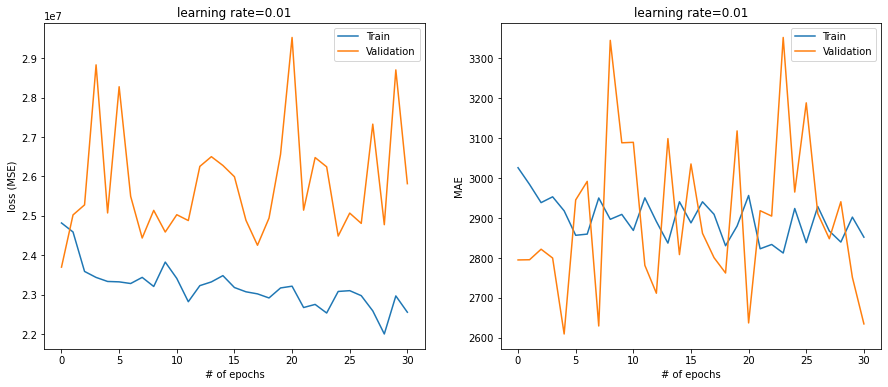

In [22]:
#plotting

fig, axs = plt.subplots(1,2,
                        figsize=(15, 6),
                        gridspec_kw={'hspace': 0.5, 'wspace': 0.2}) 
(ax1, ax2) = axs
ax1.plot(h.history['loss'], label='Train')
ax1.plot(h.history['val_loss'], label='Validation')
ax1.set_title('learning rate=' + str(0.01))
ax1.legend(loc="upper right")
ax1.set_xlabel("# of epochs")
ax1.set_ylabel("loss (MSE)")

ax2.plot(h.history['mae'], label='Train')
ax2.plot(h.history['val_mae'], label='Validation')
ax2.set_title('learning rate=' + str(0.01))
ax2.legend(loc="upper right")
ax2.set_xlabel("# of epochs")
ax2.set_ylabel("MAE")

### Evaluation

In [23]:
val_mse, val_mae = model_regr.evaluate(x_test, y_test, verbose = 1)

5/5 [==============================] - 0s 1ms/step - loss: 19133180.0000 - mae: 2262.7266


In [24]:
y_predict = model_regr.predict(x_test)

5/5 [==============================] - 0s 1ms/step


In [39]:
r2_score(y_test, y_predict) 

0.8613088309056655

### Predicted vs. Actual Charges

In [28]:
# show/hide code
a = y_test.values.reshape(-1,1).flatten()
b = y_predict.flatten()
diff = (b - a)

sim_data={"Actual Charges":a, 'Predicted Charges':b, 'Difference':np.round(diff,2)}

sim_data=pd.DataFrame(sim_data)

# Showing first 5 rows
sim_data.head(5)

,Actual Charges,Predicted Charges,Difference
0,9095.06825,11333.367188,2238.30
1,5272.17580,6162.547363,890.37
2,29330.98315,31177.480469,1846.50
3,9301.89355,8654.780273,-647.11
4,33750.29180,29927.000000,-3823.29


### Visualization

Text(0, 0.5, 'Predicted Charges')

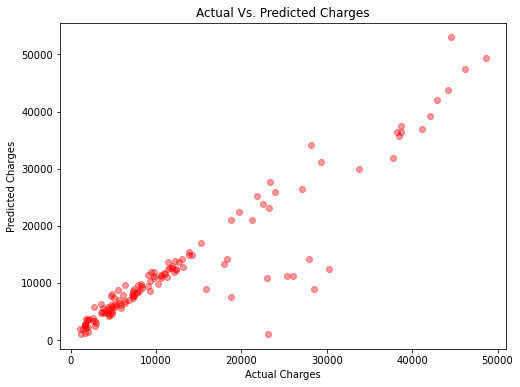

In [29]:
# visualization of actual vs. predicted charges
plt.figure(figsize=(8, 6)) 

plt.scatter(y_test, y_predict, alpha=0.4, color = 'red')
plt.title("Actual Vs. Predicted Charges")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")

# GridSearchCV
Finding the optimal hypeparameters value

### Function For Designing Model
Function that creates and returns your Keras sequential model (To use in skires wrappers)

In [30]:
def design_model(features):
  # ann model instance  
  model_regr = Sequential()
  
  
  #### INPUT LAYER>>>>
  #adding the input layer
  model_regr.add(Dense(units = X.shape[1] , activation = 'relu')) 


  #### HIDDEN LAYER1>>>>
  # there are a numbers of activation functions such as softmax, sigmoid, 
  # but ReLU (relu) (Rectified Linear Unit) is very effective in many applications and we’ll use it here.
  model_regr.add(Dense(128, activation = 'relu'))


  #### OUTPUT LAYER>>>>
  model_regr.add(Dense(1, activation = 'linear'))  


  #### Optimizer
  # WE have a lot of optimizers such as SGD (Stochastic Gradient Descent optimizer), Adam, RMSprop, and others.
  # right now adam is the best one as its solved previous optmizers issues.
  opt = Adam(learning_rate = 0.01)
  # loss/cost 
  # MSE, MAE, Huber loss  
  model_regr.compile(loss='mse',  metrics=['mae'], optimizer=opt)  
    

  return model_regr

Invoke our fucntion and pass the x_train argument then save it in a variable.

In [31]:
model_regr2 = design_model(x_train)

Fitting our training set to our `model_regr`

### Training Phase/Fit The Model

In [32]:
model_regr2.fit(x_train, y_train, 
                validation_split=0.2, 
                verbose=1)

31/31 [==============================] - 0s 5ms/step - loss: 324299840.0000 - mae: 13392.2930 - val_loss: 321864480.0000 - val_mae: 12848.9375


To use KerasRegressor, we must define a function that creates and returns your Keras sequential model,(Above Function)
then pass this function to the model argument when constructing the KerasClassifier class.

In [33]:
model = KerasRegressor(model = model_regr2)

### Setting Up Hyperparameters

This is computational extensive, we will use small value here.

List of hyperparameters:
 1. the learning rate
 2. number of batches
 3. number of epochs
 4. number of units per hidden layer
 5. activation functions.

In [34]:
param_grid = dict(epochs = [50,100],
                  batch_size = [1,10,50])

In [35]:
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid,
                    n_jobs=-1, # use all processor cores of our machine (faster!!)
                    scoring = 'r2',
                    return_train_score = True,
                    cv=3)

grid_result = grid.fit(x_train, y_train)

INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmpt8ngp_np\assets
INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmp4ud6gjj_\assets
INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmp014i7xkg\assets
INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmpx6w6uner\assets
INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmp_wu39pjp\assets
INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmptstdxian\assets
INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmpe81x0hfl\assets
INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmprsjo91k7\assets
INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmpbz_seytx\assets
INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmp59mokznn\assets
INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmp0vycjdoo\assets
INFO:tensorflow:Assets written to: C:\Users

1204/1204 [==============================] - 1s 898us/step - loss: 24307042.0000 - mae: 2970.2827
Epoch 45/50
1204/1204 [==============================] - 1s 871us/step - loss: 24267976.0000 - mae: 2936.3923
Epoch 46/50
1204/1204 [==============================] - 1s 883us/step - loss: 24272378.0000 - mae: 2957.2742
Epoch 47/50
1204/1204 [==============================] - 1s 878us/step - loss: 24445916.0000 - mae: 2925.5486
Epoch 48/50
1204/1204 [==============================] - 1s 866us/step - loss: 24264078.0000 - mae: 2944.6091
Epoch 49/50
1204/1204 [==============================] - 1s 872us/step - loss: 24204900.0000 - mae: 2973.1604
Epoch 50/50
1204/1204 [==============================] - 1s 887us/step - loss: 23774552.0000 - mae: 2900.9993


In [36]:
grid_result.best_score_ , grid_result.best_params_

(0.8295704291875609, {'batch_size': 1, 'epochs': 50})